In [1]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

In [2]:
import pickle
with open("met-embeddings.pkl","rb") as f:
    metadata, embeddings = pickle.load(f)

In [3]:
def distance(emb1, emb2, threshold=0.8):

    return np.sum(np.square(emb1 - emb2))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

C:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import os

In [77]:
def recognize(img_path):
  img = load_image(img_path)
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embedding_vector = vgg_face_embedder.predict(np.expand_dims(img, axis=0),verbose=0)[0]
  distances = []
  names = []
  for i in range(len(embeddings)):
    dist = distance(embedding_vector,embeddings[i])
    if dist > 0:
      distances.append(dist)
      names.append(metadata[i].name)
  if distances:
    min_dist = min(distances)
    return names[distances.index(min_dist)]

  return "No Match Found"

In [7]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [8]:
metadata[0].image_path()

'D:\\Users\\DELL\\Desktop\\Major Project\\105_classes_pins_dataset\\pins_Tom Hardy\\Tom Hardy10_1215.jpg'

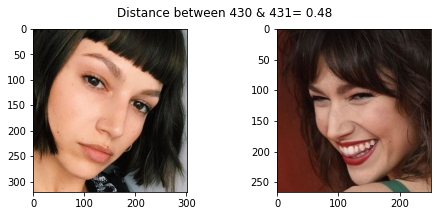

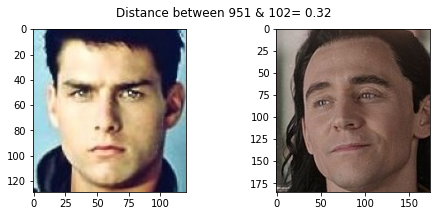

In [9]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(430, 431)
show_pair(951, 102)

In [10]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

In [11]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (15545,2622)
y_train shape : (15545,)
X_test shape : (1944,2622)
y_test shape : (1944,)


In [12]:
y_test[0], y_train[988]

('pins_Tom Hardy', 'pins_Rihanna')

In [13]:
len(np.unique(y_test)), len(np.unique(y_train))

(105, 105)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [15]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Adriana Lima' 'pins_Alex Lawther' 'pins_Alexandra Daddario'
 'pins_Alvaro Morte' 'pins_Amanda Crew' 'pins_Andy Samberg'
 'pins_Anne Hathaway' 'pins_Anthony Mackie' 'pins_Avril Lavigne'
 'pins_Ben Affleck' 'pins_Bill Gates' 'pins_Bobby Morley'
 'pins_Brenton Thwaites' 'pins_Brian J. Smith' 'pins_Brie Larson'
 'pins_Chris Evans' 'pins_Chris Hemsworth' 'pins_Chris Pratt'
 'pins_Christian Bale' 'pins_Cristiano Ronaldo' 'pins_Danielle Panabaker'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Eliza Taylor'
 'pins_Elizabeth Lail' 'pins_Emilia Clarke' 'pins_Emma Stone'
 'pins_Emma Watson' 'pins_Gwyneth Paltrow' 'pins_Henry Cavil'
 'pins_Hugh Jackman' 'pins_Inbar Lavi' 'pins_Irina Shayk'
 'pins_Jake Mcdorman' 'pins_Jason Momoa' 'pins_Jennifer Lawrence'
 'pins_Jeremy Renner' 'pins_Jessica Barden' 'pins_Jimmy Fallon'
 'pins_Johnny Depp' 'pins_Josh Radnor' 'pins_Katharine Mcphee'
 'pins_Katherine Langford' 'pins_Keanu Reeves' 'pins_Krysten Ritter'
 'pins_Leonardo DiCaprio' 'pins_Lili R

In [16]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [80 80 80 ...  2  2  2]
y_test_encoded :  [80 80 80 ...  2  2  2]


In [17]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [18]:
X_test_std = scaler.transform(X_test)

In [19]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (15545,2622)
y_train_encoded shape : (15545,)
X_test_std shape : (1944,2622)
y_test_encoded shape : (1944,)


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [21]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [22]:
y_predict = clf.predict(X_test_pca)

In [23]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [80 80 80 ...  2  2  2]
y_test_encoded :  [80 80 80 ...  2  2  2]


In [24]:
y_predict_encoded = le.inverse_transform(y_predict)

In [25]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['pins_Tom Hardy' 'pins_Tom Hardy' 'pins_Tom Hardy' ...
 'pins_Alexandra Daddario' 'pins_Alexandra Daddario'
 'pins_Alexandra Daddario']


In [26]:
print('y_predict shape : ', y_predict.shape)
print('y_test_encoded shape : ', y_test_encoded.shape)

y_predict shape :  (1944,)
y_test_encoded shape :  (1944,)


In [27]:
y_test_encoded[32:49]

array([86, 86, 83, 83, 83, 83, 83, 88, 88, 88, 88, 88, 88, 84, 84, 84, 84])

In [28]:
accuracy_score(y_test_encoded, y_predict)

0.9670781893004116

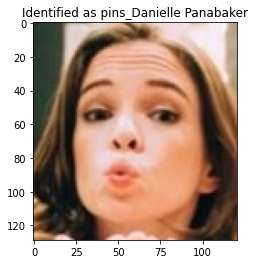

In [29]:
example_idx = 401

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

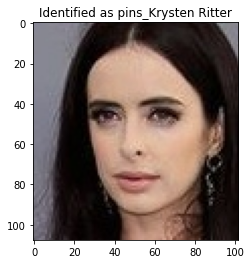

In [30]:
example_idx = 243

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

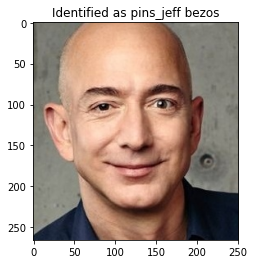

In [31]:
example_idx = 317

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] 
example_identity =  y_predict_encoded[example_idx] 

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

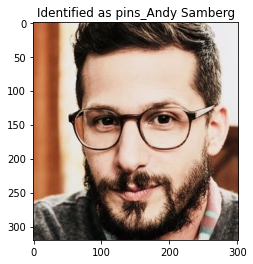

In [32]:
example_idx = -27

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [40]:
model = vgg_face()

model.load_weights(r"D:\Users\DELL\Desktop\Major Project\VGG_Face\vgg_face_weights.h5")

In [41]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [42]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 2s 2s/step
(2622,)


In [43]:
model.save('vgg_face_model.h5')

C:\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
from tensorflow.keras.models import load_model

In [45]:
vgg_face_model = load_model("vgg_face_model.h5")

In [46]:
vgg_face_descriptor_2 = Model(inputs=vgg_face_model.layers[0].input, outputs=vgg_face_model.layers[-2].output)

In [47]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector_2 = vgg_face_descriptor_2.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector_2.shape)

(224, 224, 3)
1/1 [==============================] - 1s 1s/step
(2622,)


In [48]:
distance(embedding_vector,embedding_vector_2)

0.0

In [49]:
vgg_face_descriptor.save("vgg_face_embedder.h5")

In [50]:
vgg_face_embedder = load_model("vgg_face_embedder.h5")

In [51]:
embedding_vector_3 = vgg_face_embedder.predict(np.expand_dims(img, axis=0))[0]

1/1 [==============================] - 1s 1s/step


In [86]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = r"D:\Users\DELL\Desktop\Major Project\Github Face Rec\test_images\tom_holland.jpg"
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector_2 = vgg_face_descriptor_2.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector_2.shape)

(224, 224, 3)
1/1 [==============================] - 1s 947ms/step
(2622,)


In [87]:
emd_2_scaled = scaler.transform([embedding_vector_2])

In [88]:
emb_2_pca = pca.transform(emd_2_scaled)

In [97]:
le.inverse_transform(pipeline.predict([embedding_vector_2]))  # no distance calculation required.. improved time complexity

array(['pins_Tom Holland'], dtype='<U27')

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Assuming you have x_train, x_test, y_train, y_test available

# Step 1: Standard Scaler for x_train and x_test
scaler = StandardScaler()

# Step 3: PCA with 128 components for x_train and x_test
pca = PCA(n_components=128)

# Step 4: Support Vector Classifier (SVC) with specified parameters
svc = SVC(C=5, gamma=0.001)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('svc', svc)
])

# Fit the pipeline on training data
# Fit the LabelEncoder only on y_train
y_train_encoded = le.fit_transform(y_train)
# Fit the rest of the pipeline with transformed y_train
pipeline.fit(X_train, y_train_encoded)

# Transform y_test using the fitted LabelEncoder
y_test_encoded = le.transform(y_test)

# Evaluate on test data
accuracy = pipeline.score(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.9665637860082305


In [98]:
with open("model_pipeline.pkl","wb") as f:
    pickle.dump(pipeline,f)

In [99]:
f.close()

In [100]:
with open("model_pipeline.pkl","rb") as f:
    mp = pickle.load(f)

In [101]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = r"D:\Users\DELL\Desktop\Major Project\Github Face Rec\test_images\tom_holland.jpg"
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector_2 = vgg_face_embedder.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector_2.shape)

(224, 224, 3)
1/1 [==============================] - 3s 3s/step
(2622,)


In [103]:
le.inverse_transform(mp.predict([embedding_vector_2]))

array(['pins_Tom Holland'], dtype='<U27')

In [104]:
f.close()

In [106]:
with open("model_utils.pkl","wb") as f:
    pickle.dump([metadata,embeddings,pipeline,le],f)

In [107]:
f.close()